In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [58]:
spectra = pd.read_csv('./data/viral_spectra_dataset.csv').query('df == "nemu"')
# spectra = spectra.melt(['Type', 'taxname', 'virusname'], 
#         spectra.columns[:12], 'Mut', 'Rate').sort_values(['virusname', 'Mut'])
spectra

,A>C,A>G,A>T,C>A,C>G,C>T,G>A,G>C,G>T,T>A,T>C,T>G,Type,taxname,df,taxid,virusname
0,0.109127,0.117342,0.073464,0.060217,0.011690,0.149450,0.196651,0.026968,0.020779,0.036932,0.132424,0.064957,ds,Hepatitis B virus,nemu,10407,HBV
1,0.034784,0.086621,0.027108,0.044784,0.006846,0.339187,0.234664,0.000000,0.102792,0.009995,0.095861,0.017356,ds,Rice black streaked dwarf virus,nemu,10990,RBSDV
2,0.012922,0.127692,0.009847,0.022595,0.001792,0.379747,0.123494,0.003866,0.031890,0.022814,0.249177,0.014165,+,West Nile virus,nemu,11082,WNV
3,0.009244,0.183506,0.025201,0.014157,0.002805,0.243095,0.227613,0.012168,0.021287,0.031341,0.224274,0.005309,+,Norwalk virus,nemu,11983,norw
4,0.008840,0.102109,0.025178,0.031668,0.010016,0.490211,0.153864,0.018815,0.025828,0.020681,0.106414,0.006376,+,Hepatovirus A,nemu,12092,HAV
5,0.012652,0.223645,0.018232,0.014670,0.002589,0.201530,0.137092,0.014227,0.017123,0.020364,0.319673,0.018203,+,Foot-and-mouth disease virus,nemu,12110,FMDV
6,0.023573,0.236911,0.063843,0.026172,0.019579,0.233199,0.139336,0.012520,0.030695,0.032620,0.165367,0.016185,+,Citrus tristeza virus,nemu,12162,CTV
7,0.007133,0.108281,0.018650,0.025002,0.004258,0.287104,0.184085,0.007617,0.012060,0.041765,0.293600,0.010445,+,Dengue virus,nemu,12637,denv
8,0.017020,0.091356,0.028301,0.044811,0.004483,0.357214,0.095441,0.009720,0.158906,0.017986,0.153859,0.020902,+,Porcine epidemic diarrhea virus,nemu,28295,PEDV
9,0.019673,0.236590,0.032809,0.015163,0.019141,0.217214,0.148364,0.015851,0.042233,0.026322,0.211156,0.015485,+,Porcine reproductive and respiratory syndrome ...,nemu,28344,PRRSV


In [59]:
mut_all = pd.read_csv('./data/allmut_nemu.csv')
mut_ns = mut_all[mut_all['Label'] == 0]
mut_ns

,Mut,Label,PosInGene,PosInCodon,RefCodon,AltCodon,RefAa,AltAa,ProbaRef,ProbaMut,ProbaFull,RefNode,AltNode,Gene,taxid,Type,taxname,df,virusname
0,A[G>A]A,0,29,2,AGA,AAA,R,K,0.316040,0.301881,0.301881,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV
2,G[C>T]C,0,773,2,GCC,GTC,A,V,0.645726,0.321229,0.321229,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV
3,A[G>A]C,0,776,2,AGC,AAC,S,N,0.657652,0.314946,0.314946,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV
4,C[A>G]C,0,797,2,CAC,CGC,H,R,0.574844,0.342262,0.342262,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV
5,A[G>A]G,0,904,1,GGA,AGA,G,R,0.736543,0.713864,0.713864,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594233,A[A>T]T,0,812,2,AAT,ATT,N,I,0.997930,0.997930,0.997930,Node2,RN_3,1,77763,ds,Banna virus,nemu,BAV
594235,C[A>G]C,0,1391,2,CAC,CGC,H,R,0.987528,0.987528,0.987528,Node2,RN_3,1,77763,ds,Banna virus,nemu,BAV
594244,A[G>A]C,0,68,2,AGC,AAC,S,N,0.999620,0.999620,0.999620,Node11,RN_9,1,77763,ds,Banna virus,nemu,BAV
594246,G[G>T]C,0,1153,1,GCT,TCT,A,S,0.999950,0.999950,0.999950,Node11,RN_9,1,77763,ds,Banna virus,nemu,BAV


In [ ]:
from pymutspec.annotation import mutations_summary

_ = mutations_summary(mut_all, 'taxname')
_.to_csv('./data/mutation_summary_vir.csv')  # Supl Table 1
_

,non-syn,syn,syn4f,Stop loss
taxname,,,,
Akabane orthobunyavirus,428.0,4194.0,1495.0,0.0
Alphacoronavirus 1,1044.0,3234.0,1507.0,0.0
Avian coronavirus,8300.0,52229.0,24712.0,0.0
Avian orthoreovirus,458.0,14981.0,8748.0,0.0
Banna virus,354.0,3818.0,1717.0,0.0
Citrus tristeza virus,2281.0,5747.0,2959.0,0.0
Deformed wing virus,1758.0,14711.0,6977.0,0.0
Dengue virus,975.0,4977.0,2423.0,0.0
Enterovirus A,2911.0,39710.0,19074.0,0.0


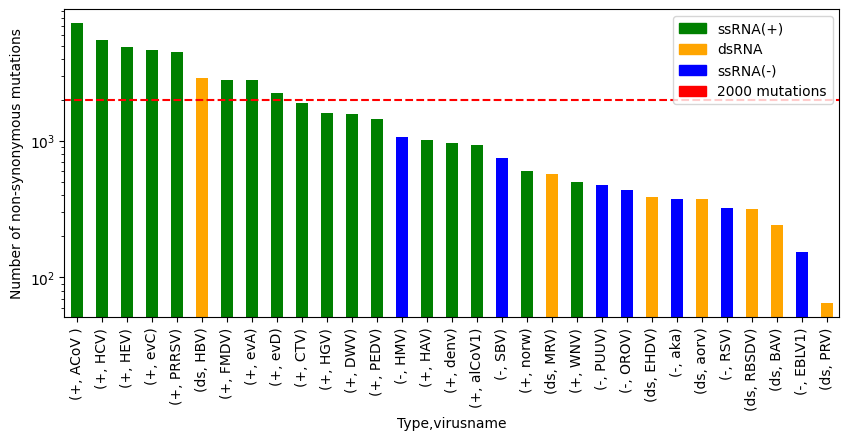

In [ ]:
_d = mut_ns.groupby(['Type', 'virusname']).ProbaFull.sum().sort_values(ascending=False)
plt.figure(figsize=(10, 4))
_d.plot.bar(color=_d.index.get_level_values(0).map({'+': 'green', 'ds': 'orange', '-': 'blue'}))

plt.hlines(y=2000, xmin=-1, xmax=mut_all['virusname'].nunique(), color='red', linestyle='--')
plt.ylabel('Number of non-synonymous mutations')
plt.yscale('log')
legend_labels = {'green': 'ssRNA(+)', 'orange': 'dsRNA', 'blue': 'ssRNA(-)', 'red': '2000 mutations'}
patches = [mpatches.Patch(color=color, label=label) for color, label in legend_labels.items()]
plt.legend(handles=patches, loc="upper right")
# plt.savefig('figures/ns_mut_cnt.pdf', bbox_inches='tight')
plt.show()

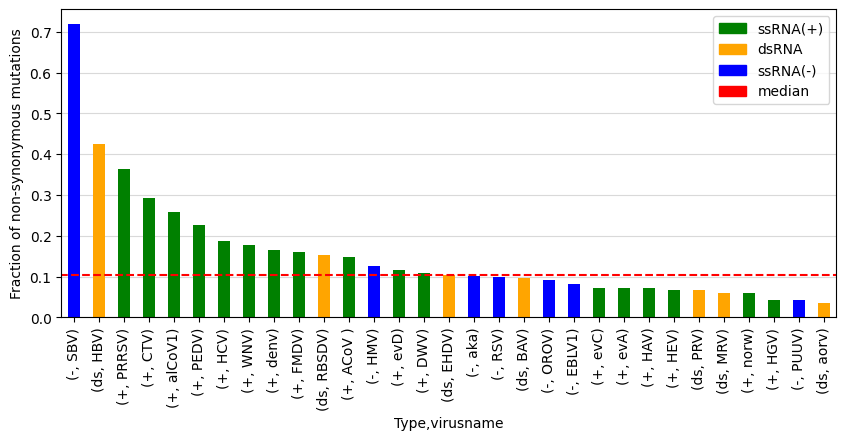

In [ ]:
dnds = mut_all.groupby(['Type', 'virusname', 'Label']).ProbaFull.sum().unstack()
dnds['Dn'] = dnds[0]
dnds['Ds'] = dnds[1] + dnds[2]
dnds['DnDs'] = dnds['Dn'] / (dnds['Dn'] + dnds['Ds'])

_d = dnds.DnDs.sort_values(ascending=False)


plt.figure(figsize=(10, 4))
ax = _d.plot.bar(color=_d.index.get_level_values(0).map({'+': 'green', 'ds': 'orange', '-': 'blue'}))
plt.hlines(y=_d.median(), xmin=-1, xmax=_d.index.nunique(), color='red', linestyle='--', label='median')
legend_labels = {'green': 'ssRNA(+)', 'orange': 'dsRNA', 'blue': 'ssRNA(-)', 'red': 'median'}
patches = [mpatches.Patch(color=color, label=label) for color, label in legend_labels.items()]
plt.legend(handles=patches, loc="upper right")
plt.grid(axis='y', color='.85')
ax.set_axisbelow(True)
plt.ylabel('Fraction of non-synonymous mutations')
# plt.savefig('figures/ns_mut_frac.pdf', dpi=300, bbox_inches='tight')
plt.show()

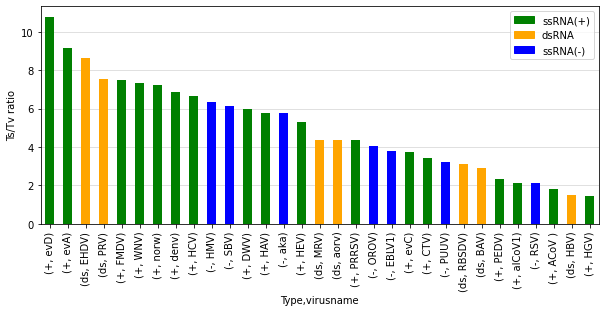

In [ ]:
ts = spectra['C>T'] + spectra['T>C'] + spectra['A>G'] + spectra['G>A']
tv = spectra.iloc[:, :12].sum(1) - ts
spectra['ts_tv'] = ts / tv

_d = spectra.set_index(['Type', 'virusname', ]).ts_tv.sort_values(ascending=False)

plt.figure(figsize=(10, 4))
ax = _d.plot.bar(color=_d.index.get_level_values(0).map({'+': 'green', 'ds': 'orange', '-': 'blue'}))
# plt.hlines(y=_d.median(), xmin=-1, xmax=_d.index.nunique(), color='red', linestyle='--', label='median')
legend_labels = {'green': 'ssRNA(+)', 'orange': 'dsRNA', 'blue': 'ssRNA(-)',}
patches = [mpatches.Patch(color=color, label=label) for color, label in legend_labels.items()]
plt.legend(handles=patches, loc="upper right")
plt.grid(axis='y', color='.85')
ax.set_axisbelow(True)
plt.ylabel('Ts/Tv ratio')
# plt.savefig('figures/tstv.pdf', dpi=300, bbox_inches='tight')
plt.show()

## Neutral model fit results

In [2]:
vir_fit = pd.read_csv('./data/virs_fit_metrics.csv')\
    .sort_values(['Type', 'mut_count']).set_index(['Type', 'virusname'])
print(vir_fit.shape)
vir_fit

(20, 14)


r2     mape      wape     slope  intercept  \
Type virusname                                                     
+    WNV        0.033837  1.71924  0.843942  0.371521   0.004190   
     norw       0.047302  3.54595  0.922882  0.252156   0.004986   
     alCoV1    -0.302937  1.41201  0.754293  0.359105   0.004273   
     denv       0.134120  2.01187  0.782598  0.355615   0.004296   
     HAV       -0.846721  1.83527  1.029350  0.273920   0.004841   
     PEDV      -0.049517  1.17231  0.784659  0.515342   0.003231   
     DWV       -0.413318  1.48995  0.855090  0.516771   0.003222   
     HGV        0.099596  2.22006  0.838872  0.127048   0.005820   
     CTV        0.263910  1.10257  0.652005  0.458372   0.003611   
     evD        0.253287  2.07585  0.805865  0.423507   0.003843   
     evA        0.198686  2.11541  0.885658  0.312345   0.004584   
     FMDV       0.220753  1.62785  0.783973  0.462078   0.003586   
     PRRSV      0.569571  1.05095  0.485767  0.729516   0.001803   
     evC        0.202164  2.59936  0.844153  0.301930   0.004654   
     HEV        0.401469  1.06813  0.588886  0.573202   0.002845   
     HCV        0.100645  4.51929  0.949301  0.279959   0.004800   
     ACoV       0.132246  1.98694  0.745437  0.320324   0.004531   
-    HMV        0.164452  1.34446  0.802944  0.434263   0.003772   
ds   MRV        0.107395  1.41193  0.798088  0.230446   0.005130   
     HBV        0.130590  1.53578  0.698985  0.283182   0.004779   

                spearman_corr    spearman_p  pearson_corr     pearson_p  \
Type virusname                                                            
+    WNV             0.564182  5.552490e-14      0.441161  1.600110e-08   
     norw            0.493512  1.392420e-10      0.372998  2.590980e-06   
     alCoV1          0.359444  6.261810e-06      0.355367  8.101800e-06   
     denv            0.595249  9.494280e-16      0.468113  1.537400e-09   
     HAV             0.336617  2.533470e-05      0.231956  4.287970e-03   
     PEDV            0.508756  2.988410e-11      0.495842  1.105980e-10   
     DWV             0.639456  1.284920e-18      0.429621  4.106580e-08   
     HGV             0.546537  4.662870e-13      0.323224  5.474410e-05   
     CTV             0.720344  2.764170e-25      0.567305  3.759780e-14   
     evD             0.639814  1.212540e-18      0.549626  3.241740e-13   
     evA             0.597364  7.082680e-16      0.478550  5.867890e-10   
     FMDV            0.692402  9.832600e-23      0.550951  2.770390e-13   
     PRRSV           0.789203  3.801340e-33      0.773520  4.090900e-31   
     evC             0.685991  3.448180e-22      0.476384  7.185450e-10   
     HEV             0.786192  9.622050e-33      0.664123  1.973800e-20   
     HCV             0.606687  1.895890e-16      0.413103  1.490590e-07   
     ACoV            0.579993  7.389400e-15      0.449248  8.093140e-09   
-    HMV             0.633503  3.328140e-18      0.517540  1.188660e-11   
ds   MRV             0.566399  4.211870e-14      0.387593  9.571550e-07   
     HBV             0.582388  5.392330e-15      0.428978  4.323320e-08   

                 ks_stat          ks_p      rmse  log_likelihood  mut_count  
Type virusname                                                               
+    WNV        0.426667  1.248880e-12  0.012121        -5.67321    501.693  
     norw       0.353333  1.044100e-08  0.012257        -5.81473    598.962  
     alCoV1     0.140000  1.057380e-01  0.008489        -6.08549    929.824  
     denv       0.313333  6.587400e-07  0.011680        -5.61925    972.842  
     HAV        0.166667  3.083900e-02  0.013440        -6.26793   1020.310  
     PEDV       0.120000  2.307820e-01  0.008605        -5.98029   1458.280  
     DWV        0.200000  4.857930e-03  0.011607        -5.87911   1568.950  
     HGV        0.333333  8.870020e-08  0.012502        -5.78701   1613.560  
     CTV        0.140000  1.057380e-01  0.007599        -5.73733   1913.750  
     evD        

In [5]:
vir_fit[['spearman_corr', 'r2', 'slope', 'mut_count']]\
    .reset_index().drop('virusname', axis=1).groupby('Type').mean().round(2)

,spearman_corr,r2,slope,mut_count
Type,,,,
+,0.60,0.06,0.39,2660.63
-,0.63,0.16,0.43,1063.28
ds,0.57,0.12,0.26,1725.48


## Random model fit results

In [7]:
metrics_rnd_df = pd.read_csv('data/virs_rnd_fit_metrics.csv', index_col=[0,1,2,3])
print(metrics_rnd_df.shape)

(441, 14)


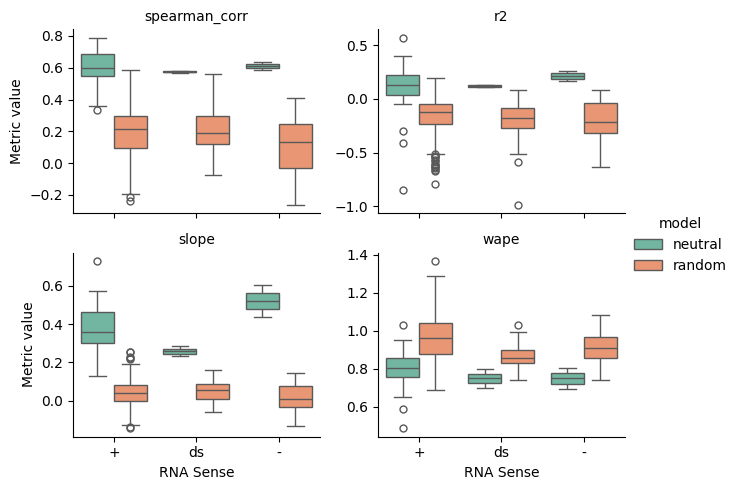

In [8]:
_ = metrics_rnd_df[['spearman_corr', 'r2', 'slope', 'wape']]\
    .melt(ignore_index=False, var_name='metric').reset_index()
g = sns.catplot(data=_, sharey=False, kind='box', col='metric', col_wrap=2,
                y='value', hue='model', x='Type', palette='Set2', height=2.5, aspect=1.3,
)
g.set_titles('{col_name}')
# g.set_xticklabels(g.axes[2].get_xticklabels(), rotation=-45)
g.set_xlabels('RNA Sense')
g.set_ylabels('Metric value')
g.savefig('./figures/vir_rnd_fit_metrics_boxplots.pdf')


In [11]:
# correlations significance
metrics_rnd_df[['spearman_p', 'pearson_p']]\
    .melt(ignore_index=False, var_name='metric').reset_index()\
        .groupby(['model',  'metric']).value.agg(['mean', 'std', 'max']).round(5)

mean      std      max
model   metric                               
neutral pearson_p   0.00021  0.00094  0.00429
        spearman_p  0.00000  0.00001  0.00003
random  pearson_p   0.29072  0.30383  0.99722
        spearman_p  0.15014  0.24622  0.99511

In [15]:
# correlations significance
metrics_rnd_df[['spearman_p', 'pearson_p']]\
    .melt(ignore_index=False, var_name='metric').reset_index()\
        .groupby(['model', 'Type',  'metric']).value.agg(['mean', 'std', 'max']).round(5)

mean      std      max
model   Type metric                               
neutral +    pearson_p   0.00026  0.00104  0.00429
             spearman_p  0.00000  0.00001  0.00003
        -    pearson_p   0.00000  0.00000  0.00000
             spearman_p  0.00000  0.00000  0.00000
        ds   pearson_p   0.00000  0.00000  0.00000
             spearman_p  0.00000  0.00000  0.00000
random  +    pearson_p   0.28674  0.30563  0.99722
             spearman_p  0.14909  0.24949  0.99511
        -    pearson_p   0.28666  0.27757  0.91258
             spearman_p  0.20193  0.27182  0.86726
        ds   pearson_p   0.32868  0.31803  0.96397
             spearman_p  0.10725  0.17811  0.72534

In [33]:
metrics_rnd_df.reset_index().query('Type == "-" & model == "neutral"')

,Type,virusname,model,replica,r2,mape,wape,slope,intercept,spearman_corr,spearman_p,pearson_corr,pearson_p,ks_stat,ks_p,rmse,log_likelihood,mut_count
189,-,HMV,neutral,1,0.164452,1.34446,0.802944,0.434263,0.003772,0.633503,3.328140e-18,0.517540,1.188660e-11,0.213333,0.002106,0.010271,-5.70834,1063.280
273,-,SBV,neutral,1,0.261519,1.04424,0.694189,0.605195,0.002686,0.585873,6.439950e-15,0.621286,4.623950e-17,0.204082,0.004291,0.008393,-inf,752.477


In [27]:
metrics_rnd_df.reset_index().query('r2 < 0 & model == "neutral"')

,Type,virusname,model,replica,r2,mape,wape,slope,intercept,spearman_corr,spearman_p,pearson_corr,pearson_p,ks_stat,ks_p,rmse,log_likelihood,mut_count
42,+,DWV,neutral,1,-0.413318,1.48995,0.855090,0.516771,0.003222,0.639456,1.284920e-18,0.429621,4.106580e-08,0.200000,0.004858,0.011607,-5.87911,1568.950
84,+,HAV,neutral,1,-0.846721,1.83527,1.029350,0.273920,0.004841,0.336617,2.533470e-05,0.231956,4.287970e-03,0.166667,0.030839,0.013440,-6.26793,1020.310
231,+,PEDV,neutral,1,-0.049517,1.17231,0.784659,0.515342,0.003231,0.508756,2.988410e-11,0.495842,1.105980e-10,0.120000,0.230782,0.008605,-5.98029,1458.280
315,+,alCoV1,neutral,1,-0.302937,1.41201,0.754293,0.359105,0.004273,0.359444,6.261810e-06,0.355367,8.101800e-06,0.140000,0.105738,0.008489,-6.08549,929.824


(-0.1, 1.1)

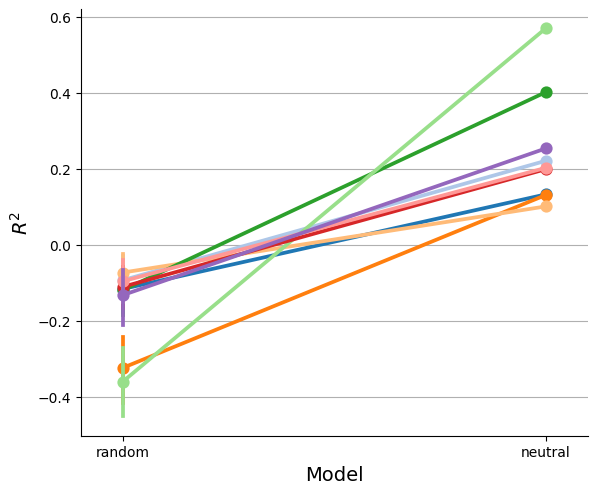

In [76]:
# sns.lineplot(metrics_rnd_df.reset_index(), x='virusname', y='r2')
_ = metrics_rnd_df.query('mut_count > 2000').reset_index()
_['Type'] = _['Type'].map({'+': 'ssRNA(+)', 'ds': 'dsRNA'})
_['Virus'] = _.Type + ': ' + _.virusname
g = sns.catplot(
    _, hue='Virus', y='r2', x='model', aspect=1.2, legend=False,
    kind='point', order=['random', 'neutral'], palette='tab20')
g.set_ylabels('$R^2$', fontsize=14)
g.set_xlabels('Model', fontsize=14)
plt.grid(axis='y')
plt.xlim(-0.1, 1.1)

(-0.1, 1.1)

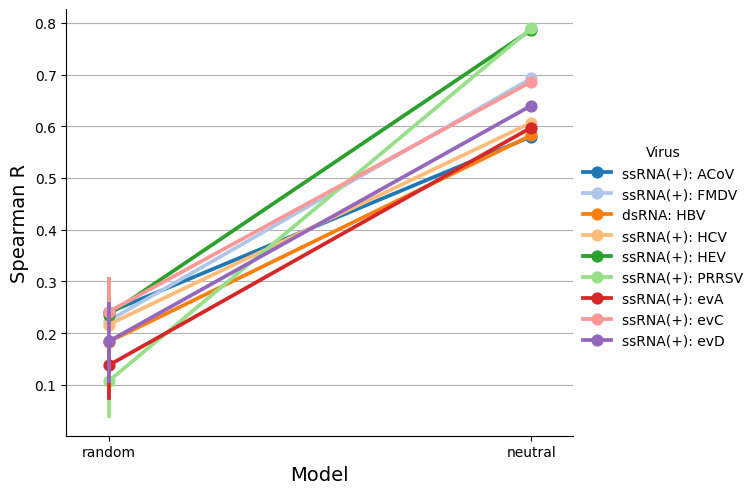

In [77]:
# sns.lineplot(metrics_rnd_df.reset_index(), x='virusname', y='r2')
_ = metrics_rnd_df.query('mut_count > 2000').reset_index()
_['Type'] = _['Type'].map({'+': 'ssRNA(+)', 'ds': 'dsRNA'})
_['Virus'] = _.Type + ': ' + _.virusname
g = sns.catplot(
    _, hue='Virus', y='spearman_corr', x='model',aspect=1.2,
    kind='point', order=['random', 'neutral'], palette='tab20')
g.set_ylabels('Spearman R', fontsize=14)
g.set_xlabels('Model', fontsize=14)
plt.grid(axis='y')
plt.xlim(-0.1, 1.1)